In [1]:
# ================================
# Part 2: EDA & Preprocessing
# Dataset: Heart Disease Dataset
# ================================

# -------------------------------
# Core Data Handling Libraries
# -------------------------------
import pandas as pd            # Data manipulation and analysis
import numpy as np             # Numerical computations

# -------------------------------
# Data Visualization Libraries
# -------------------------------
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Advanced statistical plots

# -------------------------------
# Data Preprocessing
# -------------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder: converts categorical data to numerical
# StandardScaler: standardizes features (mean=0, std=1)

# -------------------------------
# Train-Test Split
# -------------------------------
from sklearn.model_selection import train_test_split
# Splits dataset into training and testing sets

# -------------------------------
# Machine Learning Models
# -------------------------------
from sklearn.linear_model import LinearRegression, LogisticRegression
# LinearRegression: regression tasks
# LogisticRegression: classification tasks

# -------------------------------
# Model Evaluation Metrics
# -------------------------------
from sklearn.metrics import (
    mean_squared_error,   # Measures regression error
    r2_score,             # Regression goodness of fit
    accuracy_score,       # Classification accuracy
    confusion_matrix,     # Classification error breakdown
    classification_report,# Precision, recall, F1-score
    precision_score,      # Positive prediction accuracy
    recall_score          # Ability to find all positives
)

# -------------------------------
# Clustering
# -------------------------------
from sklearn.cluster import KMeans
# KMeans: unsupervised clustering algorithm

from sklearn.metrics import silhouette_score
# Silhouette score: evaluates clustering quality


In [3]:
# -------------------------------
# 2. Load Dataset
# -------------------------------

# Load the Heart Disease dataset
df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')


# -------------------------------
# 3. Initial Inspection
# -------------------------------

# Display dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Display data types of each column
print("\nData Types:\n", df.dtypes)

# Display first 5 rows of the dataset
print("\nFirst 5 rows:\n", df.head())


# -------------------------------
# 4. Column Name Cleaning
# -------------------------------

# Clean column names: remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Display cleaned column names
print(df.columns)


# -------------------------------
# 5. Target Variable Inspection
# -------------------------------

# In heart disease datasets, the target column is often named
# 'target' or 'heart disease'
print("\nTarget distribution:\n", df['heart disease'].value_counts())

Shape of dataset: (270, 14)

Data Types:
 age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

First 5 rows:
    age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                

<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
C:\Users\WIN10\AppData\Local\Temp\ipykernel_6548\1524094228.py:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
  df = pd.read_csv('C:\ML CAPSTONE\data\dataset_heart.csv')



Missing values per column:
 age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
st segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

Missing values after handling:
 age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
e

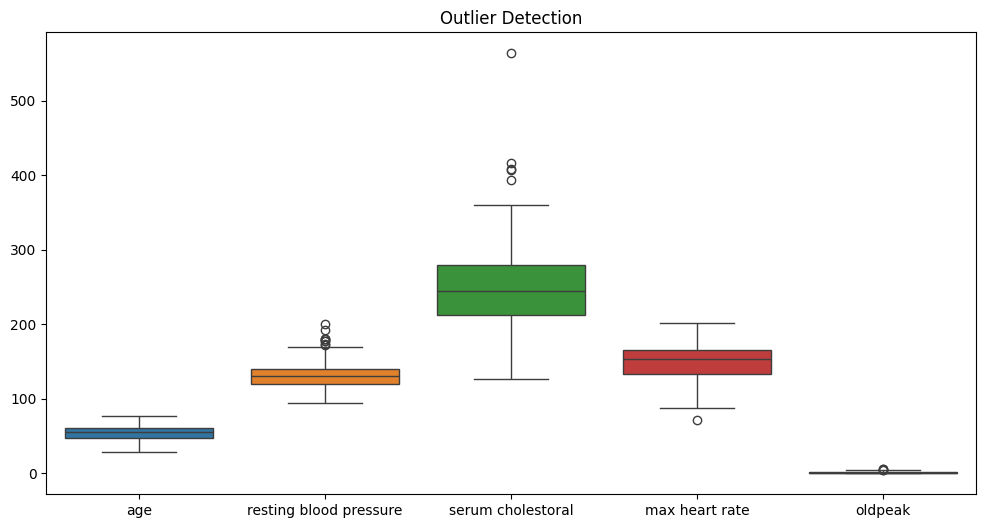

In [4]:
# -------------------------------
# 4. Missing Values Handling
# -------------------------------

# Display number of missing values in each column
print("\nMissing values per column:\n", df.isnull().sum())

# Handle missing values:
# Replace missing values with the median for numeric columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Confirm that there are no remaining missing values
print("\nMissing values after handling:\n", df.isnull().sum())


# -------------------------------
# 5. Categorical Feature Handling
# -------------------------------

# List of categorical columns
cat_cols = [
    'sex',
    'chest pain type',
    'fasting blood sugar',
    'resting electrocardiographic results',
    'exercise induced angina',
    'st segment',
    'major vessels',
    'thal'
]

# Apply One-Hot Encoding to categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


# -------------------------------
# 6. Outlier Visualization
# -------------------------------

# Visualize potential outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[
    ['age',
     'resting blood pressure',
     'serum cholestoral',
     'max heart rate',
     'oldpeak']
])
plt.title('Outlier Detection')
plt.show()

# (Optional) Outliers are only visualized here, not removed


In [5]:
# -------------------------------
# 7. Split Features and Target
# -------------------------------

# Separate input features (X) and target variable (y)
X = df.drop('heart disease', axis=1)
y = df['heart disease']


# -------------------------------
# 8. Feature Scaling
# -------------------------------

# Standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# -------------------------------
# 9. Train-Test Split
# -------------------------------

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display shapes of training and testing sets
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# ================================
# End of Part 2
# ================================

Train shape: (216, 20)
Test shape: (54, 20)


MSE: 75.93356210572085
RMSE: 8.713986579386088
R2 Score: 0.04448989738024056


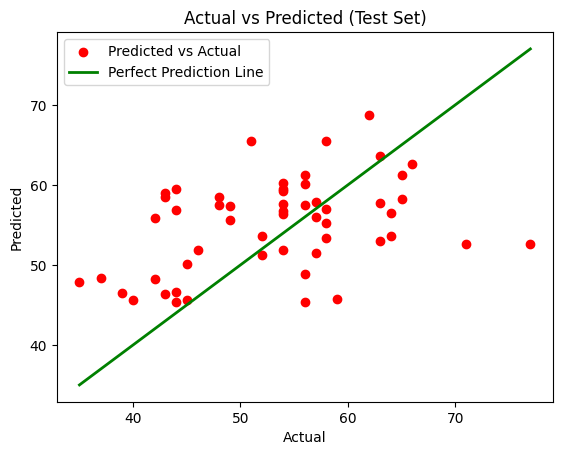

In [6]:
# -------------------------------
# 1. Split Features and Target
# -------------------------------

# Target variable: Age
y = df['age']

# Input features (excluding age and heart disease)
X = df.drop(columns=[
    'age',
    'heart disease'
])


# -------------------------------
# 2. Train-Test Split
# -------------------------------

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -------------------------------
# 3. Train Linear Regression Model
# -------------------------------

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# -------------------------------
# 4. Prediction
# -------------------------------

# Predict age values for the test set
y_pred = model.predict(X_test)


# -------------------------------
# 5. Model Evaluation
# -------------------------------

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


# -------------------------------
# 6. Visualization
# -------------------------------

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="red", label="Predicted vs Actual")

# Ideal prediction line (perfect prediction)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="green",
    linewidth=2,
    label="Perfect Prediction Line"
)

# Plot labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


Accuracy: 0.6666666666666666
Precision: 0.5882352941176471
Recall: 0.47619047619047616


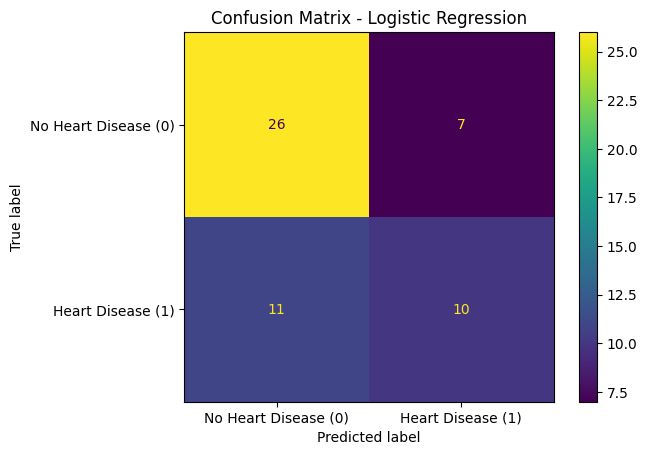

In [7]:
# -------------------------------
# Classification: Logistic Regression
# -------------------------------

# -------------------------------
# 1. Target Mapping
# -------------------------------

# Map target values:
# 1 → 0 (No Heart Disease)
# 2 → 1 (Heart Disease)
df['heart disease'] = df['heart disease'].map({1: 0, 2: 1})


# -------------------------------
# 2. Split Features and Target
# -------------------------------

# Target variable
y = df['heart disease']

# Feature set (drop target column)
X = df.drop(columns=['heart disease'], errors='ignore')

# Keep only numerical features
X = X.select_dtypes(include=['int64', 'float64'])


# -------------------------------
# 3. Train-Test Split
# -------------------------------

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -------------------------------
# 4. Train Logistic Regression Model
# -------------------------------

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Train the model
model.fit(X_train, y_train)


# -------------------------------
# 5. Make Predictions
# -------------------------------

# Predict class labels on the test set
y_pred = model.predict(X_test)


# -------------------------------
# 6. Model Evaluation
# -------------------------------

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


# -------------------------------
# 7. Confusion Matrix Visualization
# -------------------------------

from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Heart Disease (0)", "Heart Disease (1)"]
)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [9]:
# -------------------------------
# Load Dataset
# -------------------------------

# Load the Heart Disease dataset
df = pd.read_csv("C:\ML CAPSTONE\data\dataset_heart.csv")


# -------------------------------
# Prepare Data (No Target Column)
# -------------------------------

# Drop target column if it exists
X = df.drop(columns=['target'], errors='ignore')


# -------------------------------
# Select Numerical Features Only
# -------------------------------

# Keep only numeric columns (int and float types)
X = X.select_dtypes(include=['int64', 'float64'])


# -------------------------------
# Handle Missing Values
# -------------------------------

# Fill missing values using the mean of each column
# (without removing any rows)
X = X.fillna(X.mean())


# -------------------------------
# Final Data Shape
# -------------------------------

# Display final feature matrix shape
print("Final X shape:", X.shape)


Final X shape: (270, 14)


<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
<>:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
C:\Users\WIN10\AppData\Local\Temp\ipykernel_6548\4241960031.py:6: SyntaxWarning: "\M" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\M"? A raw string is also an option.
  df = pd.read_csv("C:\ML CAPSTONE\data\dataset_heart.csv")


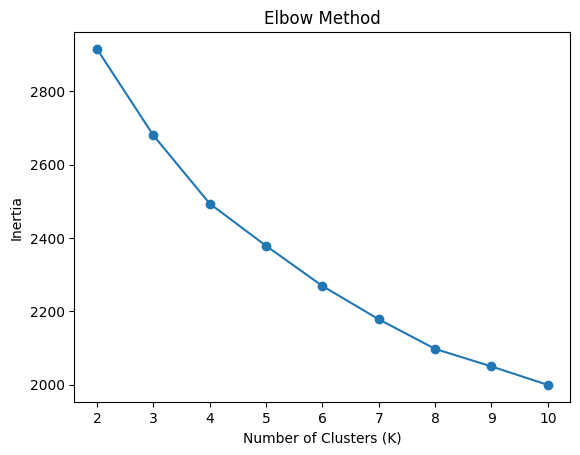

Silhouette Score: 0.17187526160030075


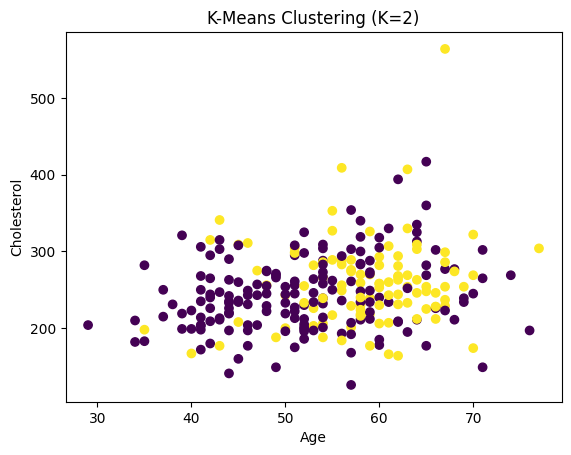

In [10]:
# -------------------------------
# Required Libraries
# -------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# =========================
# 1. Select Features (No Label)
# =========================

# Remove target column to keep only features
X = df.drop(columns=['heart disease'])


# =========================
# 2. Feature Scaling
# =========================

# Standardize features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================
# 3. Elbow Method
# =========================

# Store inertia values for different K
inertia = []
K_range = range(2, 11)

# Train K-Means for each K and record inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


# =========================
# 4. Fit K-Means Using Optimal K
# =========================

# Choose optimal number of clusters
optimal_k = 2

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)


# =========================
# 5. Silhouette Score
# =========================

# Evaluate clustering quality
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)


# =========================
# 6. Cluster Visualization
# =========================
# Choose two key features for visualization

plt.scatter(
    df['age'],
    df['serum cholestoral'],
    c=labels,
    cmap='viridis'
)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.show()


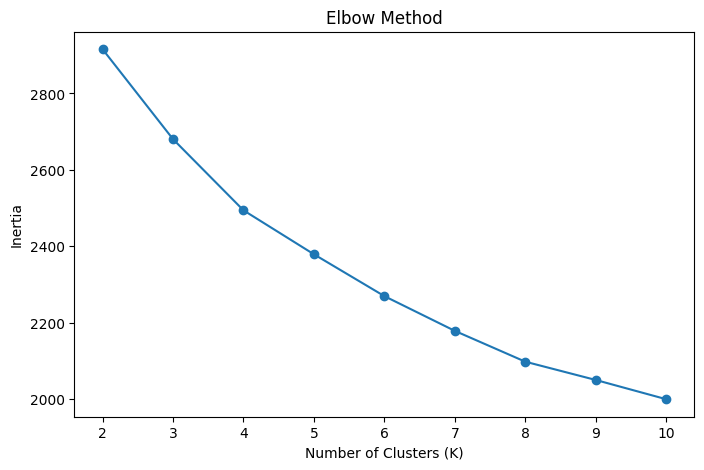

Silhouette Score: 0.13125306826660937


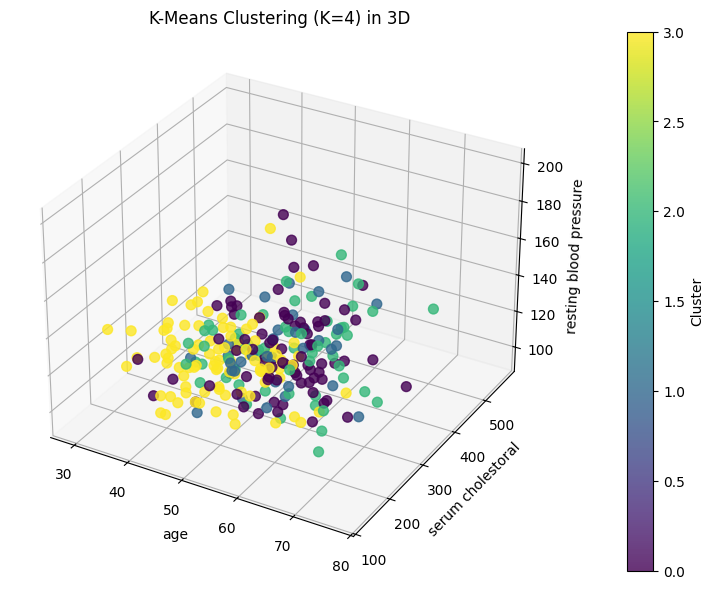

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =========================
# 1. Select Features (excluding the label)
# =========================
X = df.drop(columns=['heart disease'])

# =========================
# 2. Scale Features
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# 3. Elbow Method to find optimal number of clusters (K)
# =========================
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# =========================
# 4. Fit K-Means with the chosen optimal K
# =========================
optimal_k = 4  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# =========================
# 5. Calculate Silhouette Score to evaluate clustering quality
# =========================
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# =========================
# 6. 3D Visualization using three important features
# =========================
features_3d = ['age', 'serum cholestoral', 'resting blood pressure']  # Change features if needed
X_3d = df[features_3d]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_3d[features_3d[0]],
    X_3d[features_3d[1]],
    X_3d[features_3d[2]],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.8
)

ax.set_xlabel(features_3d[0])
ax.set_ylabel(features_3d[1])
ax.set_zlabel(features_3d[2])
ax.set_title(f"K-Means Clustering (K={optimal_k}) in 3D")

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()
